# Regression from ch 4

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import pymc3 as pm
import pandas as pd

%matplotlib inline
sns.set(font_scale=1.5)

Text(0.5, 0, '$y$')

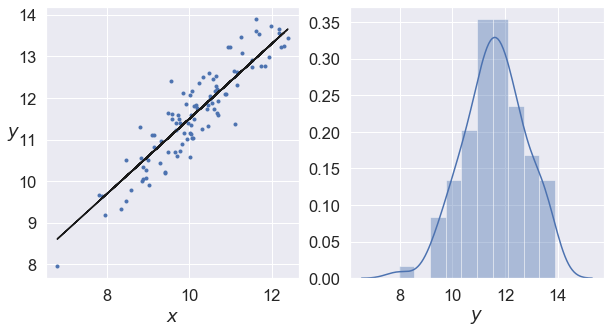

In [2]:
np.random.seed(314)
N = 100
alfa_real = 2.5
beta_real = 0.9
eps_real = np.random.normal(0, 0.5, size=N)
x = np.random.normal(10, 1, N)
y_real = alfa_real + beta_real * x
y = y_real + eps_real
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(x, y, 'b.')
plt.xlabel('$x$', )
plt.ylabel('$y$', rotation=0)
plt.plot(x, y_real, 'k')
plt.subplot(1,2,2)
sns.distplot(y)
plt.xlabel('$y$')

In [3]:
with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=1)
    epsilon = pm.HalfCauchy('epsilon', 5)
    #mu = pm.Deterministic('mu', alpha + beta * x)
    #y_pred = pm.Normal('y_pred', mu=mu, sd=epsilon, observed=y)
    y_pred = pm.Normal('y_pred', mu= alpha + beta * x, sd=epsilon, observed=y)
    step = pm.Metropolis()
    trace = pm.sample(10000, step=step, chains=2)

WARNING (theano.gof.compilelock): Overriding existing lock by dead process '12672' (I am process '12756')
Multiprocess sampling (2 chains in 4 jobs)
CompoundStep
>Metropolis: [epsilon]
>Metropolis: [beta]
>Metropolis: [alpha]
Sampling 2 chains: 100%|██████████| 21000/21000 [00:05<00:00, 3927.02draws/s]
The estimated number of effective samples is smaller than 200 for some parameters.


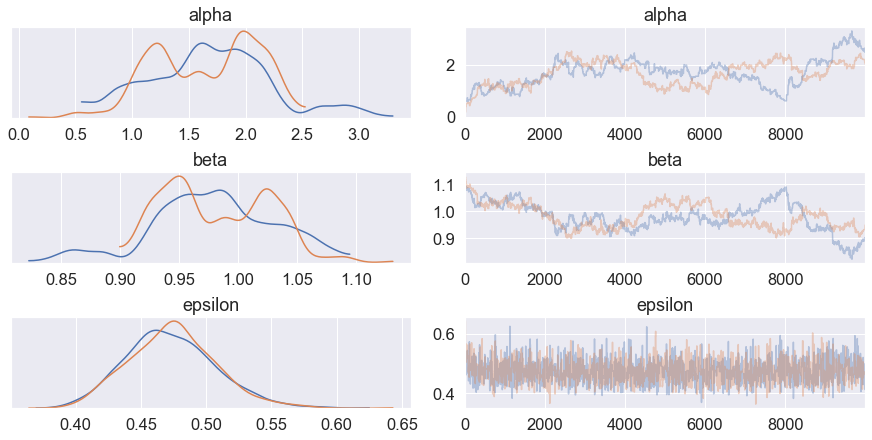

In [4]:
pm.traceplot(trace, compact=True);

### This slow wandering in alpha and beta shows an issue!

In [5]:
pm.summary(trace, var_names=('alpha', 'beta', 'epsilon'))

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alpha,1.669461,0.503898,0.049108,0.581843,2.479340,17.580114,1.001585
beta,0.980660,0.049421,0.004812,0.904448,1.090076,17.622857,1.001567
epsilon,0.473785,0.033953,0.000954,0.410031,0.541577,1324.606066,1.000454


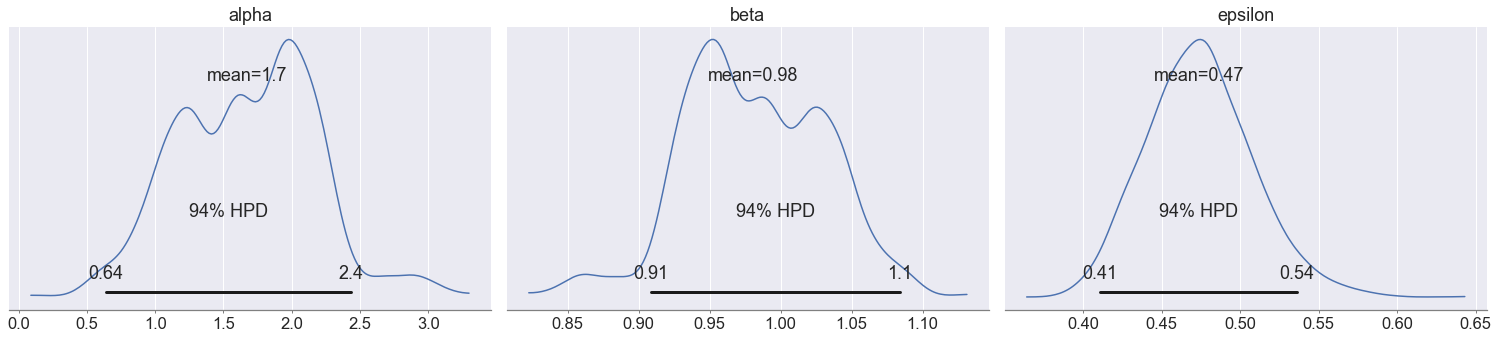

In [6]:
pm.plot_posterior(trace, var_names=('alpha', 'beta', 'epsilon'));

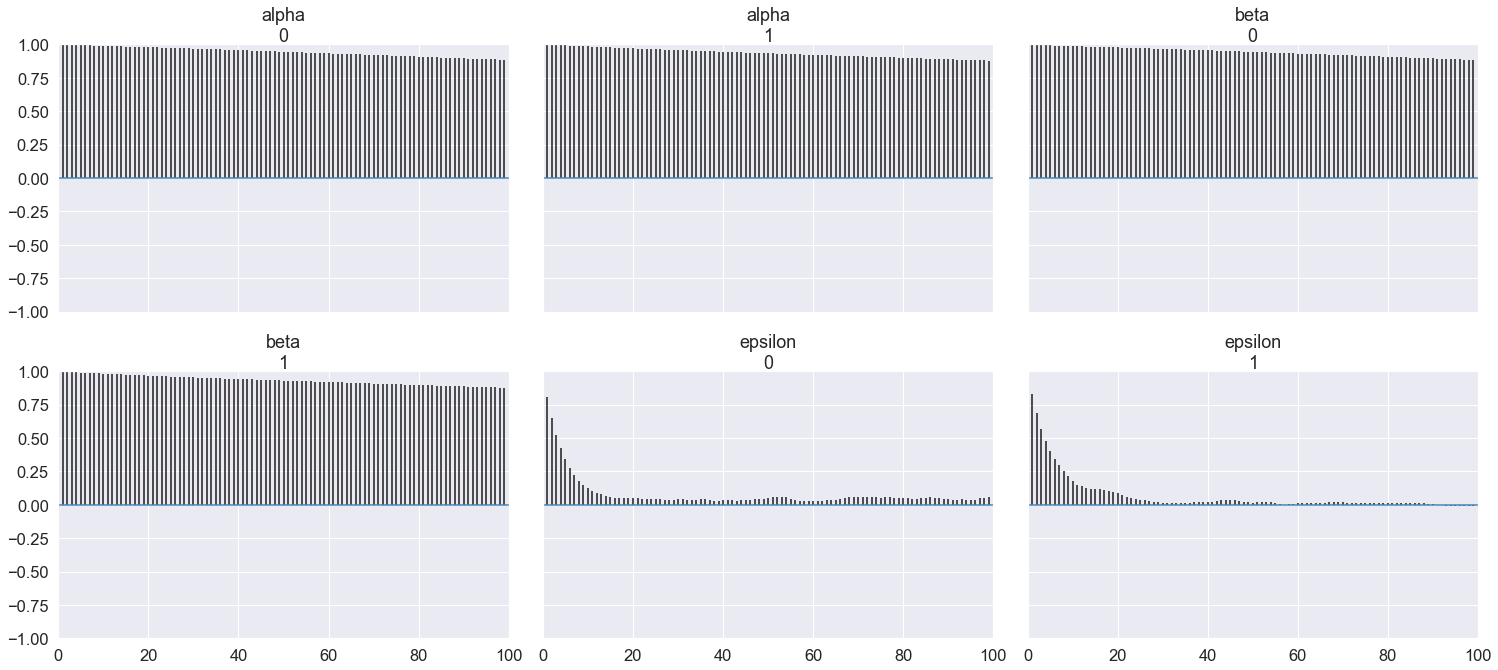

In [7]:
pm.autocorrplot(trace, var_names=('alpha', 'beta', 'epsilon'));

Text(0, 0.5, '$\\beta$')

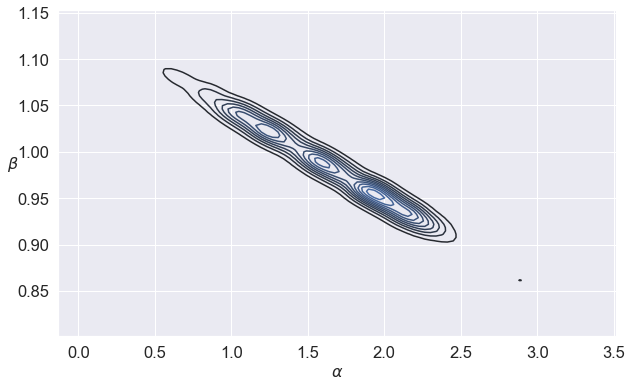

In [10]:
plt.figure(figsize=(10,6))
sns.kdeplot(trace['alpha'], trace['beta'])
plt.xlabel(r'$\alpha$', fontsize=16)
plt.ylabel(r'$\beta$', fontsize=16, rotation=0)

## Does NUTS do better?

In [11]:
with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=1)
    epsilon = pm.HalfCauchy('epsilon', 5)
    #mu = pm.Deterministic('mu', alpha + beta * x)
    #y_pred = pm.Normal('y_pred', mu=mu, sd=epsilon, observed=y)
    y_pred = pm.Normal('y_pred', mu= alpha + beta * x, sd=epsilon, observed=y)
    step = pm.Metropolis()
    trace = pm.sample(10000, step=step, chains=2)

Multiprocess sampling (2 chains in 4 jobs)
CompoundStep
>Metropolis: [epsilon]
>Metropolis: [beta]
>Metropolis: [alpha]
Sampling 2 chains: 100%|██████████| 21000/21000 [00:05<00:00, 3905.94draws/s]
The gelman-rubin statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


### No!

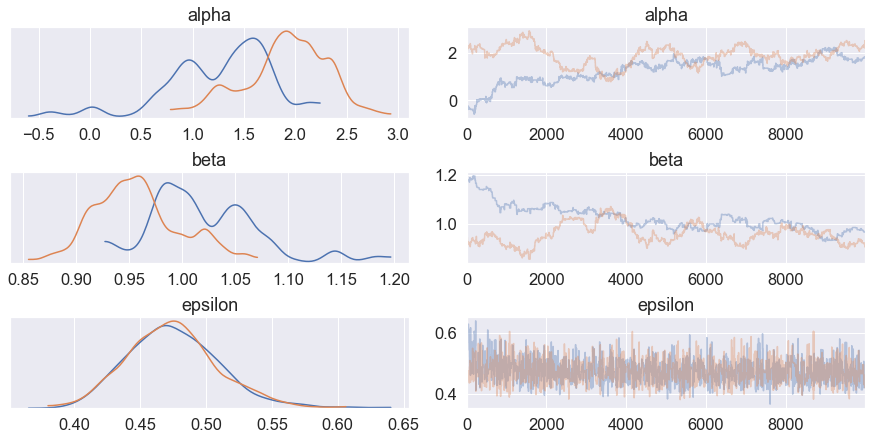

In [12]:
pm.traceplot(trace, compact=True);

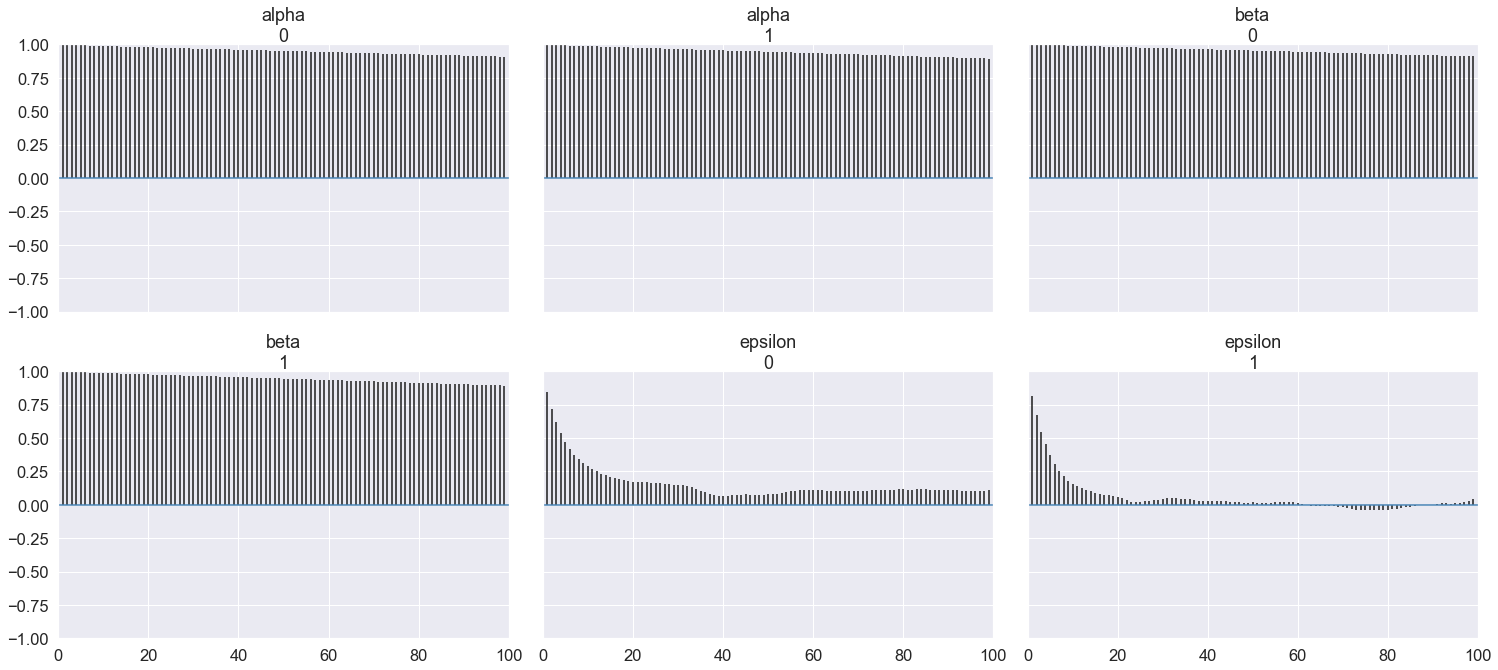

In [13]:
pm.autocorrplot(trace, var_names=('alpha', 'beta', 'epsilon'));

Text(0, 0.5, '$\\beta$')

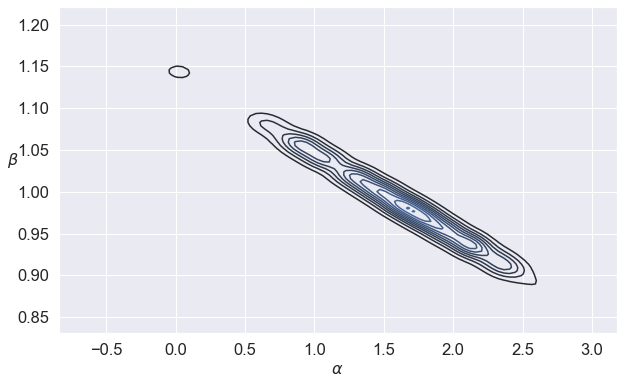

In [14]:
plt.figure(figsize=(10,6))
sns.kdeplot(trace['alpha'], trace['beta'])
plt.xlabel(r'$\alpha$', fontsize=16)
plt.ylabel(r'$\beta$', fontsize=16, rotation=0)

### Try subtracting the mean

In [16]:
xmean = np.mean(x)
with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=1)
    epsilon = pm.HalfCauchy('epsilon', 5)
    #mu = pm.Deterministic('mu', alpha + beta * x)
    #y_pred = pm.Normal('y_pred', mu=mu, sd=epsilon, observed=y)
    y_pred = pm.Normal('y_pred', mu= alpha + beta * (x-xmean), sd=epsilon, observed=y)
    step = pm.Metropolis()
    trace = pm.sample(10000, step=step, chains=2)

Multiprocess sampling (2 chains in 4 jobs)
CompoundStep
>Metropolis: [epsilon]
>Metropolis: [beta]
>Metropolis: [alpha]
Sampling 2 chains: 100%|██████████| 21000/21000 [00:05<00:00, 4025.07draws/s]
The number of effective samples is smaller than 10% for some parameters.


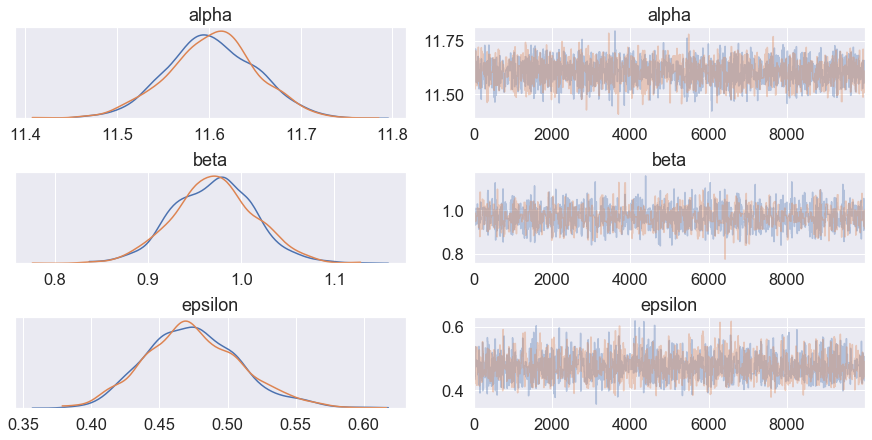

In [17]:
pm.traceplot(trace, compact=True);

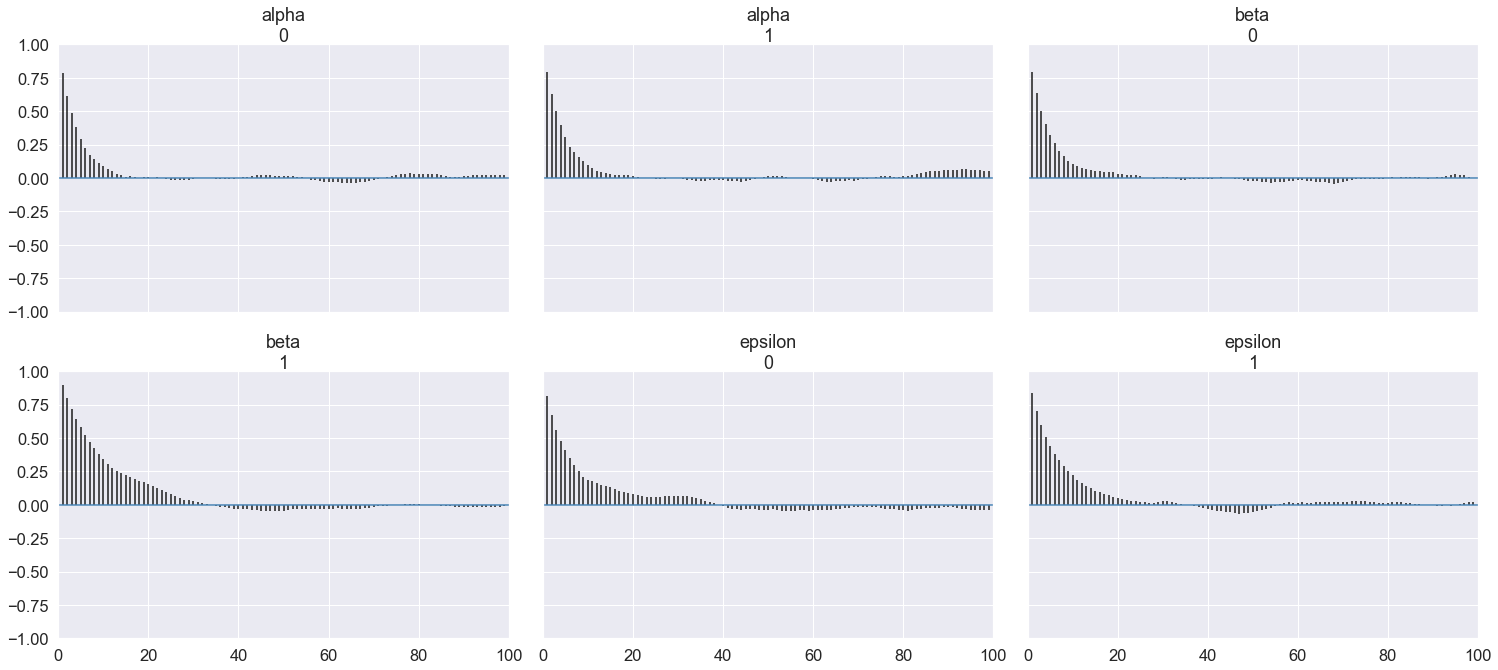

In [18]:
pm.autocorrplot(trace, var_names=('alpha', 'beta', 'epsilon'));

Text(0, 0.5, '$\\beta$')

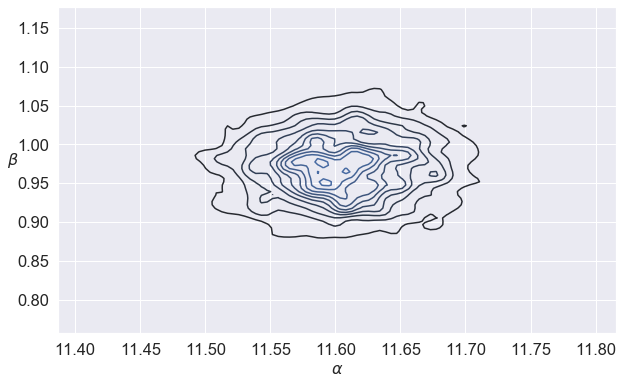

In [19]:
plt.figure(figsize=(10,6))
sns.kdeplot(trace['alpha'], trace['beta'])
plt.xlabel(r'$\alpha$', fontsize=16)
plt.ylabel(r'$\beta$', fontsize=16, rotation=0)